# Netflix Movies Investigation

Netflix is good.

Why is it good?

Because of the amount of data it has that we can play with!

This project demostrates:

Python skills

Data manipulation skills

Data exploration

Linear Regression

The hypothesis : Year on year the average duration of Netflix movies decreasing

# Assess the Data

In [1]:
# Import the libraries we'll be using

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

%matplotlib inline


# The below code distables a recurring warning in our case this is a false positive 
# pandas does not differentiate it from our intended use

pd.options.mode.chained_assignment = None  # default='warn'


In [2]:
# Read in the csv file as a pandas dataframe object

netflix_df = pd.read_csv('netflix_data.csv')

In [3]:
# Inspect the df with the info() function

netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB


In [4]:

# From info(), we now know there is 7787 rows, we also know the names of the columns

# We know there are only 2 numerical columns containing integers

# We need more info because 'type' for example isn't extremely informative

# Let's check the first few rows to get a better idea of the content and structure


In [5]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,duration,description,genre
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,4,In a future where the elite inhabit an island ...,International TV
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,93,After a devastating earthquake hits Mexico Cit...,Dramas
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,78,"When an army recruit is found dead, his fellow...",Horror Movies
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,80,"In a postapocalyptic world, rag-doll robots hi...",Action
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,123,A brilliant group of students become card-coun...,Dramas


In [6]:
# 'type' column seemingly contains one of two categorical variables 'Movie' or 'TV Show' Let's check
netflix_df['type'].value_counts()


Movie      5377
TV Show    2410
Name: type, dtype: int64

# Remove the columns that aren't needed

In [7]:
# Yes, just two.

# Presumably individual directors won't have much impact on the trends of movie duration
# as even if they had, multiple titles they'd likely still only make up a fraction of a
# percent of all titles so this will be fairly useless.

# The same applies for the 'cast' column, unlikely to have any affect on movie duration

# The 'description' column will also likely not offer any statistical relevance.

# 'show_ID' is netflixes index reference systems column, which we wont need.

# We can drop the 'director' column
# We can drop the 'cast' column
# We can drop the 'description' column
# We can drop the 'show_id' column

netflix_df = netflix_df.drop(['director','cast','description','show_id'], axis = 1)

In [8]:
# A check of the data to make sure the dataframe has turned out as expected
netflix_df.sample(5)

,type,title,country,date_added,release_year,duration,genre
7186,Movie,Transcendence,United Kingdom,"November 1, 2018",2014,119,Sci-Fi
7402,TV Show,Velvet Colección,Spain,"February 14, 2019",2018,2,International TV
6365,Movie,The Force,United States,"January 29, 2018",2017,92,Documentaries
218,TV Show,A Queen Is Born,Brazil,"November 11, 2020",2020,1,International TV
3317,Movie,Katha,India,"December 31, 2019",1982,140,Comedies


# Remove the non Majority English speaking countries' rows

In [9]:
# It is possible that different cultures and countries will have different
# expectations and norms in regards to feature duration.

# This analysis research won't go into possibility of these differences.
# We'll therefore bediscarding non english primary language countries.

In [10]:
# First, let's make a list of all the Netflix countries as a set from the DF
Netflix_Counties = set(netflix_df['country'].unique())


In [11]:
# A set of Majority English speaking countries according to UK government
English_Speaking_Countires = {'Antigua and Barbuda','Australia','The Bahamas',
                              'Barbados','Belize','Canada','Dominica','Grenada',
                              'Guyana','Ireland','Jamaica','New Zealand',
                              'St Kitts and Nevis','St Lucia','St Vincent and the Grenadines',
                              'Trinidad and Tobago','United Kingdom','United States'}

In [12]:
# We need to find a list of the countries which have netflix and are majorioty english speaking.

# That is, we need to find the INTERESECTION of the two data sets.

English_Netflix_Countries = Netflix_Counties.intersection(English_Speaking_Countires)
English_Netflix_Countries

{'Australia',
 'Canada',
 'Ireland',
 'Jamaica',
 'New Zealand',
 'United Kingdom',
 'United States'}

In [13]:
# So let's filter for these countries only

In [14]:
netflix_df_ENG = netflix_df[netflix_df['country'].isin(English_Netflix_Countries)]

In [15]:
netflix_df_ENG.head()

,type,title,country,date_added,release_year,duration,genre
3,Movie,9,United States,"November 16, 2017",2009,80,Action
4,Movie,21,United States,"January 1, 2020",2008,123,Dramas
7,Movie,187,United States,"November 1, 2019",1997,119,Dramas
10,Movie,1922,United States,"October 20, 2017",2017,103,Dramas
14,Movie,3022,United States,"March 19, 2020",2019,91,Independent Movies


# Assess the Data

In [16]:
# We see that 2 columns contain numerical integer values, 'release_year' and 'duration'.
# Let's have a look at the descriptive stats for them.

# From my experience most films are usually around 90 mins at least' are they not? Or
# at least 80 mins long

In [17]:
netflix_df_ENG.describe()

,release_year,duration
count,3869.000000,3869.000000
mean,2013.652365,64.346601
std,9.314057,45.968415
min,1942.000000,1.000000
25%,2013.000000,4.000000
50%,2017.000000,84.000000
75%,2018.000000,98.000000
max,2021.000000,312.000000


In [18]:
# From this we can see that the average movie duration is 64 minutes
# And there is a very large standard deviation of 45 minutes.

# This is suspicious,
# it's a very LOW MEAN and very HIGH STANDARD DEVIATION,
# why has this happened?

# Furthermore, the MINIMUM duration value is 1 minute.

# I suspect that TV shows are the 'types' that have very small numbers,
# this could be epsisode count or series count.

# If we discard the TV Show type, one would expect the mean durations
# to increase and the std to decrease

netflix_df_ENG[netflix_df_ENG['type'] == 'TV Show'].describe()

,release_year,duration
count,1163.000000,1163.000000
mean,2016.071367,2.239897
std,6.339578,2.013310
min,1946.000000,1.000000
25%,2016.000000,1.000000
50%,2018.000000,1.000000
75%,2019.000000,3.000000
max,2021.000000,16.000000


# Discard tv-show rows

In [19]:
netflix_df_ENG_MOVIES = netflix_df_ENG[netflix_df_ENG['type'] == 'Movie']

In [20]:
# Let's check that the 'type' column now contains only 'Movie'
print(netflix_df_ENG_MOVIES['type'].value_counts())

# And double check by looking at a sample of rows
netflix_df_ENG_MOVIES.sample(5)

Movie    2706
Name: type, dtype: int64


,type,title,country,date_added,release_year,duration,genre
3319,Movie,Katherine Ryan: In Trouble,United Kingdom,"February 14, 2017",2017,64,Stand-Up
607,Movie,At All Costs,United States,"December 14, 2016",2016,81,Documentaries
3480,Movie,Kygo: Live at the Hollywood Bowl,United States,"March 12, 2018",2017,52,Music
3169,Movie,Jim Gaffigan: Mr. Universe,United States,"August 11, 2016",2012,77,Stand-Up
969,Movie,Blackway,United States,"December 15, 2017",2015,90,Thrillers


# Assess the Data

In [21]:
# Now let's look at the descriptive stats again for the numerical colums

In [22]:
netflix_df_ENG_MOVIES.describe()

,release_year,duration
count,2706.000000,2706.000000
mean,2012.612712,91.039172
std,10.158160,25.469795
min,1942.000000,3.000000
25%,2012.000000,81.000000
50%,2016.000000,92.000000
75%,2018.000000,104.000000
max,2021.000000,312.000000


In [23]:
# As we expected, an increase in mean duration
# and decrease in std deviation has occured.

# Now the 25th percentile range beginning at 81 minutes.

# There is however at least one outlier. The min duration is 3 mins.
# Perhaps short movies should be recatergorised.
# We need a way to deal with out liers such as this.

# It would also be wise to remove movies that are unusually long.

# Why do this? Because it will skew the vast majority of rows when it
# comes to analysis and visualisation.

# We do after all want our analysis to represent the vast majority of the
# data and for it NOT be skewed by a few outliers.

# What amount of time should this be?

In [24]:
# let's look at a histogram of move lengths to get an idea of how many which we should remove

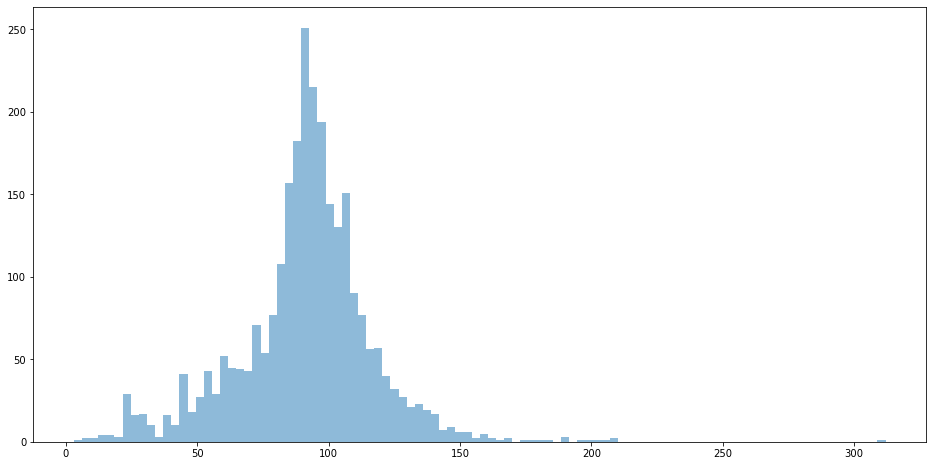

In [25]:

fig = plt.figure(figsize=(16,8))

plt.hist(netflix_df_ENG_MOVIES['duration'], bins =100, alpha = 0.5)
plt.show()

In [26]:
# As the distribution is very close to a normal distribution
# and the majority of data is within 2 standard deviations
# were the 68–95–99.7 rule suggests that 95% of the data would lie.

# We wil call anything out those boundaries a 'short film' or 'unusually long'
# That being said there is a possibility that it isn't 'short film' related it 
# might be that a certain genres have lower runtimes for example a standup comedy show or kids film

# We'll come back to this later for now though we'll keep within the 2 std

# Remove the values outside of 2 standard deviations from the mean.

Note: We may be removing a lot of a particular genre. We can assess average length by genre later

In [27]:
lower_bound = (netflix_df_ENG_MOVIES['duration'] >= netflix_df_ENG_MOVIES['duration'].mean() - (2*netflix_df_ENG_MOVIES['duration'].std()))
upper_bound = (netflix_df_ENG_MOVIES['duration'] <= netflix_df_ENG_MOVIES['duration'].mean() + (2*netflix_df_ENG_MOVIES['duration'].std()))

netflix_df_ENG_MOVIES_within_2_std_of_mean = netflix_df_ENG_MOVIES[upper_bound & lower_bound]
netflix_df_ENG_MOVIES_within_2_std_of_mean

,type,title,country,date_added,release_year,duration,genre
3,Movie,9,United States,"November 16, 2017",2009,80,Action
4,Movie,21,United States,"January 1, 2020",2008,123,Dramas
7,Movie,187,United States,"November 1, 2019",1997,119,Dramas
10,Movie,1922,United States,"October 20, 2017",2017,103,Dramas
14,Movie,3022,United States,"March 19, 2020",2019,91,Independent Movies
...,...,...,...,...,...,...,...
7758,Movie,Zack and Miri Make a Porno,United States,"October 1, 2018",2008,101,Comedies
7761,Movie,Zapped,Canada,"February 1, 2017",2014,92,Children
7778,Movie,Zombieland,United States,"November 1, 2019",2009,88,Comedies
7781,Movie,Zoom,United States,"January 11, 2020",2006,88,Children


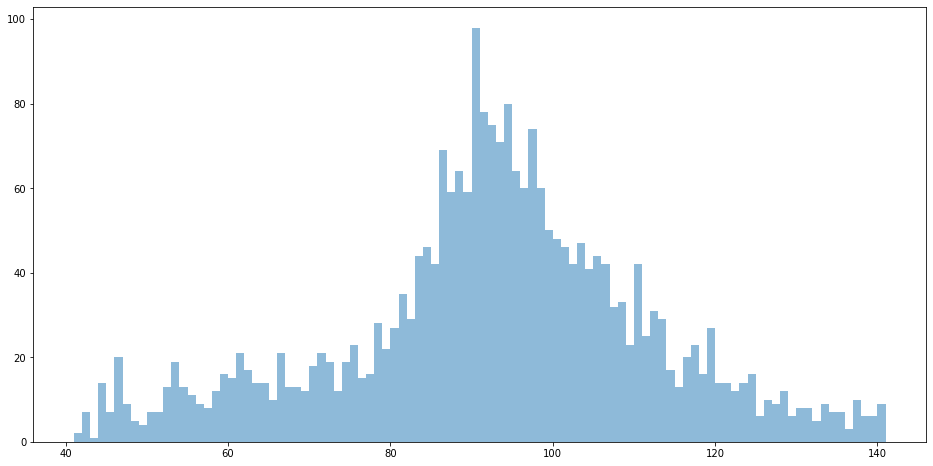

In [28]:
fig = plt.figure(figsize=(16,8))
plt.hist(netflix_df_ENG_MOVIES_within_2_std_of_mean['duration'], bins =100, alpha = 0.5)
plt.show()

In [29]:
# And let's just check what percentage of the values still remain?
# I.E. is the 68–95–99.7 rule holding true for this distribution?

In [30]:
Rule_Test = print( str(round(len(netflix_df_ENG_MOVIES_within_2_std_of_mean)/
                             len(netflix_df_ENG_MOVIES)*100,2)) + '%')

93.98%


In [31]:
# Wow, the rule has been fairly accurate 

# So working with this 94% should allow us to analyse a more representive sample of the data set.
# This should now be reflected in the describe() function

netflix_df_ENG_MOVIES_within_2_std_of_mean.describe()

,release_year,duration
count,2543.000000,2543.000000
mean,2012.804168,92.137633
std,9.649614,19.459351
min,1942.000000,41.000000
25%,2012.000000,83.000000
50%,2016.000000,93.000000
75%,2018.000000,104.000000
max,2021.000000,141.000000


# Assess the hypothesis
# Are movies added getting shorter on average year-on-year?

# Make a year added column and convert the date_added column to a datetime object

In [32]:
# Let's get to the hypothesis. Are films getting short or longer year on year?

In [33]:
# Making a year added column

In [34]:
netflix_df_ENG_MOVIES_within_2_std_of_mean.dtypes

type            object
title           object
country         object
date_added      object
release_year     int64
duration         int64
genre           object
dtype: object

In [35]:
# You would assume that the date_added 'object' type is a string but let's double check
netflix_df_ENG_MOVIES_within_2_std_of_mean['date_added'].dtype

dtype('O')

In [36]:
# It returned 'O' for object, but let's triple check it is a string by passing an
# element to the pythons built-in type() function
type(netflix_df_ENG_MOVIES_within_2_std_of_mean['date_added'].iloc[0])

str

In [37]:
# We can convert the string in the date_added column into a datatime object.
# This will enable us to plot time series eventually with ease.

In [38]:
# First though, We will be looking for trends by year so we will add a 'year_added" columm

In [39]:
# We will need to extract the year from the data added column and convert it's type to integer

# Let's test how we could do this by passing a table entry into the int() function

int(netflix_df_ENG_MOVIES_within_2_std_of_mean['date_added'].iloc[0].split()[-1])

2017

In [40]:
# The test returned a integer so we can go ahead

# Make a custom function that can be used with the Pandas apply() function for a new column
def year_added(x):
    date_string = x.split()
    return int(date_string[-1])

# Could this have been done with pd.to_datetime()????
# pd.to_datetime

In [41]:
# Then apply() the function to the old column in making a new column
netflix_df_ENG_MOVIES_within_2_std_of_mean.loc[:,'year_added'] = netflix_df_ENG_MOVIES_within_2_std_of_mean.loc[:,'date_added'].apply(year_added)

In [42]:
netflix_df_ENG_MOVIES_within_2_std_of_mean.head()

,type,title,country,date_added,release_year,duration,genre,year_added
3,Movie,9,United States,"November 16, 2017",2009,80,Action,2017
4,Movie,21,United States,"January 1, 2020",2008,123,Dramas,2020
7,Movie,187,United States,"November 1, 2019",1997,119,Dramas,2019
10,Movie,1922,United States,"October 20, 2017",2017,103,Dramas,2017
14,Movie,3022,United States,"March 19, 2020",2019,91,Independent Movies,2020


In [43]:
# Let's now convert the 'date_added' column from a string into a datetime object for time series later

In [44]:
def str_to_dt(string):
    dt = datetime.strptime(str(string), '%B %d, %Y')
    return dt

In [45]:
netflix_df_ENG_MOVIES_within_2_std_of_mean['date_added'] = netflix_df_ENG_MOVIES_within_2_std_of_mean['date_added'].apply(str_to_dt)

In [46]:
# Let's check the columns elements are now datetime objects
type(netflix_df_ENG_MOVIES_within_2_std_of_mean['date_added'].iloc[0])

pandas._libs.tslibs.timestamps.Timestamp

# Let's quickly find the average by year, plot it and assess

In [47]:
AVG_by_year = pd.DataFrame(netflix_df_ENG_MOVIES_within_2_std_of_mean.groupby('year_added')['duration'].mean()).reset_index()

In [48]:
AVG_by_year

,year_added,duration
0,2008,81.000000
1,2010,84.000000
2,2011,92.666667
3,2012,80.000000
4,2013,83.500000
5,2014,82.470588
6,2015,81.113636
7,2016,83.177632
8,2017,86.950237
9,2018,90.416162


In [49]:
netflix_df_ENG_MOVIES_within_2_std_of_mean = netflix_df_ENG_MOVIES_within_2_std_of_mean.sort_values('year_added').reset_index()

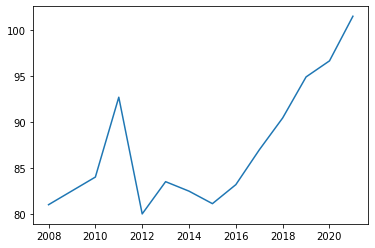

In [50]:
# Let's plot these
fig = plt.figure()

plt.plot(AVG_by_year['year_added'], AVG_by_year['duration'])

plt.show()

In [51]:
# Definitely something suspicious here, drastic volatiility in the first few years, why?
# Let's look at the first few years
netflix_df_ENG_MOVIES_within_2_std_of_mean[netflix_df_ENG_MOVIES_within_2_std_of_mean['year_added'].isin([2008,2009, 2010])]

,index,type,title,country,date_added,release_year,duration,genre,year_added
0,7113,Movie,To and From New York,United States,2008-01-01,2006,81,Dramas,2008
1,3840,Movie,Mad Ron's Prevues from Hell,United States,2010-11-01,1987,84,Cult Movies,2010


In [52]:
# Ah, there was only one per year for the first three years.
# Let's check what the number of titles added per year actually was

# It also looks like just the first few titles of 2021 have been added.
netflix_df_ENG_MOVIES_within_2_std_of_mean['year_added'].value_counts().sort_index()

2008      1
2010      1
2011     12
2012      2
2013      6
2014     17
2015     44
2016    152
2017    422
2018    495
2019    750
2020    595
2021     46
Name: year_added, dtype: int64

In [53]:
# So as there were so few new titles added in the years 2008 - 2015 and 2021 
# relative to proceeding years

# We will take any years where < 150 titles were added out as they are not
# represeentive of a trend but a just few titles.

In [54]:
total_added_in_year = netflix_df_ENG_MOVIES_within_2_std_of_mean['year_added'].value_counts().sort_index()

In [55]:
total_added_in_year = total_added_in_year.reset_index()

more_than_150_keep_list =  []

for index, row in total_added_in_year.iterrows():
    if row['year_added'] > 150:
        more_than_150_keep_list.append(row['index'])
    else:
        pass
        

In [56]:
more_than_150_keep_list

[2016, 2017, 2018, 2019, 2020]

In [57]:
# filtering those years with more than 150 additions

netflix_df_ENG_MOVIES_within_2_std_of_mean = netflix_df_ENG_MOVIES_within_2_std_of_mean[netflix_df_ENG_MOVIES_within_2_std_of_mean['year_added'].isin(more_than_150_keep_list)]



AVG_by_year = pd.DataFrame(netflix_df_ENG_MOVIES_within_2_std_of_mean.groupby('year_added')['duration'].mean()).reset_index()
STD_by_year = pd.DataFrame(netflix_df_ENG_MOVIES_within_2_std_of_mean.groupby('year_added')['duration'].std()).reset_index()


In [58]:
netflix_df_ENG_MOVIES_within_2_std_of_mean

,index,type,title,country,date_added,release_year,duration,genre,year_added
83,4644,Movie,One in a Billion,United States,2016-12-06,2016,70,Documentaries,2016
84,1822,Movie,Donald Glover: Weirdo,United States,2016-11-19,2012,65,Stand-Up,2016
85,5005,Movie,Pup Star,Canada,2016-10-29,2016,92,Children,2016
86,2817,Movie,Hot Bot,United States,2016-03-01,2016,93,Comedies,2016
87,4963,Movie,Prescription Thugs,United States,2016-04-15,2015,86,Documentaries,2016
...,...,...,...,...,...,...,...,...,...
2492,4987,Movie,Project Power,United States,2020-08-14,2020,113,Action,2020
2493,5255,Movie,Rogue Warfare: The Hunt,United States,2020-08-01,2020,104,Action,2020
2494,4991,Movie,Prospect,Canada,2020-11-02,2018,100,Sci-Fi,2020
2495,5281,Movie,Roped,United States,2020-05-02,2020,90,Children,2020


# Replot and assess std  each year

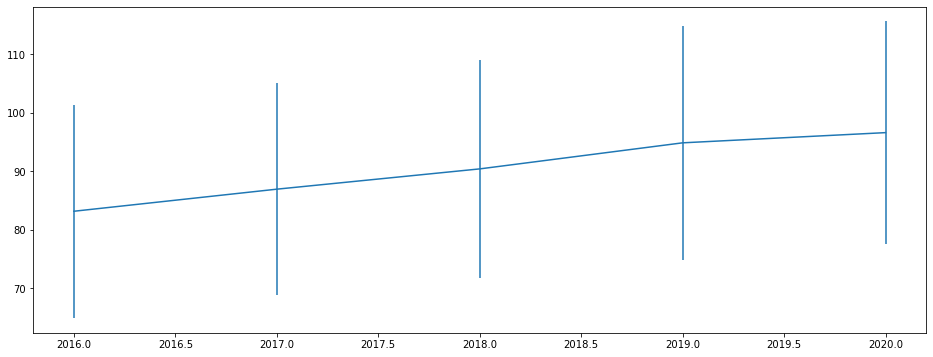

In [59]:
# Let's plot these
fig = plt.figure(figsize=(16,6))
plt.errorbar(AVG_by_year['year_added'], AVG_by_year['duration'], STD_by_year['duration'])
plt.show()



In [60]:
# The STD is quite consistent the trend does show that the average duration is increasing

# Visualising volatility and moving averages

In [61]:
NF_ENG_MOV_2STD_DTINDEX = netflix_df_ENG_MOVIES_within_2_std_of_mean.set_index('date_added').sort_index()

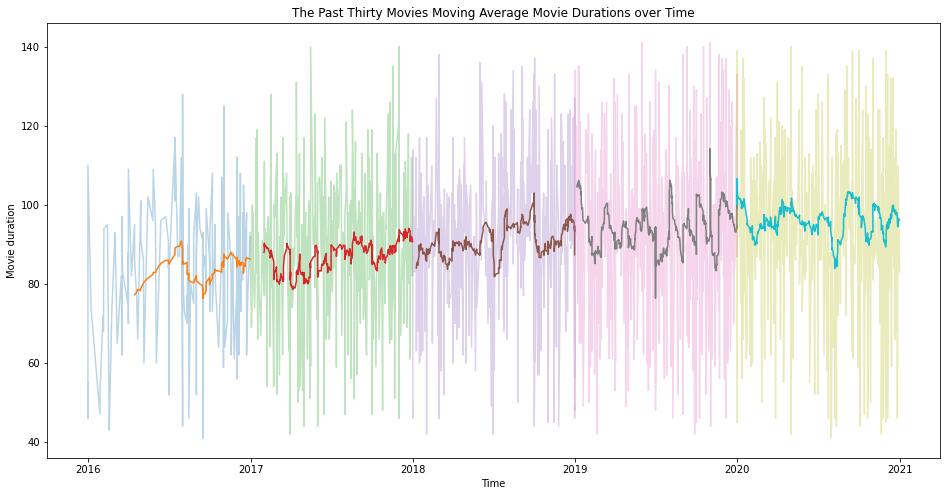

In [62]:
# How does the distribution or durations change MONTH ON MONTH
# To understand this we can look at a plot of the 30-day moving average of film durations.
# If we plot durations as a function of date_added we should expect some pretty noisy data
# If we look at the past 30 additions moving average we should be able to see gradual trend changes
# with drastically reduced noise

fig = plt.figure(figsize=(16,8))

MA_DAYS = 30

df2016 = NF_ENG_MOV_2STD_DTINDEX[NF_ENG_MOV_2STD_DTINDEX  ['year_added'] == 2016]
df2016['SMA30'] = df2016.loc[:,'duration'].rolling(window=MA_DAYS).mean()
plt.plot(df2016.index    ,    df2016['duration'], alpha = 0.3)
plt.plot(df2016.index   ,    df2016['SMA30'])

df2017 = NF_ENG_MOV_2STD_DTINDEX[NF_ENG_MOV_2STD_DTINDEX  ['year_added'] == 2017]
df2017['SMA30'] = df2017.loc[:,'duration'].rolling(window=MA_DAYS).mean()
plt.plot(df2017.index, df2017['duration'], alpha = 0.3)
plt.plot(df2017.index, df2017['SMA30'])


df2018 = NF_ENG_MOV_2STD_DTINDEX[NF_ENG_MOV_2STD_DTINDEX  ['year_added'] == 2018]
df2018['SMA30'] = df2018.loc[:,'duration'].rolling(window=MA_DAYS).mean()
plt.plot(df2018.index, df2018['duration'], alpha = 0.3)
plt.plot(df2018.index, df2018['SMA30'])


df2019 = NF_ENG_MOV_2STD_DTINDEX[NF_ENG_MOV_2STD_DTINDEX  ['year_added'] == 2019]
df2019['SMA30'] = df2019.loc[:,'duration'].rolling(window=MA_DAYS).mean()
plt.plot(df2019.index, df2019['duration'], alpha = 0.3)
plt.plot(df2019.index, df2019['SMA30'])


df2020 = NF_ENG_MOV_2STD_DTINDEX[NF_ENG_MOV_2STD_DTINDEX  ['year_added'] == 2020]
df2020['SMA30'] = df2020.loc[:,'duration'].rolling(window=MA_DAYS).mean()
plt.plot(df2020.index, df2020['duration'], alpha = 0.3)
plt.plot(df2020.index, df2020['SMA30'])


plt.title('The Past Thirty Movies Moving Average Movie Durations over Time')

plt.xlabel('Time')
plt.ylabel('Movie duration')

# Can we add regression lines to the year subsets?




plt.show()


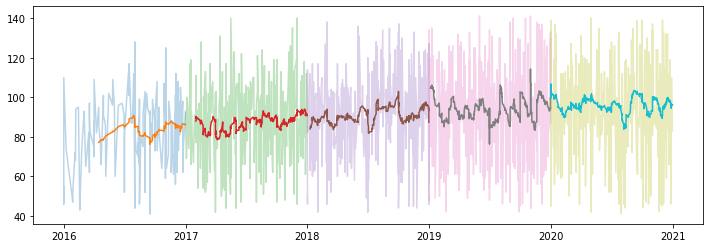

In [63]:
# A cleaner way to do this
fig = plt.figure(figsize=(12,4))
MA_DAYS = 30


# List of years
YEARS_IN_THE_SET = NF_ENG_MOV_2STD_DTINDEX['year_added'].unique()


for x in YEARS_IN_THE_SET:

    # Plot the durations as as function of release date
    plt.plot(NF_ENG_MOV_2STD_DTINDEX[NF_ENG_MOV_2STD_DTINDEX  ['year_added'] == x].index, NF_ENG_MOV_2STD_DTINDEX[NF_ENG_MOV_2STD_DTINDEX  ['year_added'] == x]['duration'], alpha = 0.3)

    # Plot the 30 day MOVING AVERAGE durations as as function of release date
    plt.plot(NF_ENG_MOV_2STD_DTINDEX[NF_ENG_MOV_2STD_DTINDEX  ['year_added'] == x].index, NF_ENG_MOV_2STD_DTINDEX[NF_ENG_MOV_2STD_DTINDEX  ['year_added'] == x].loc[:,'duration'].rolling(window=MA_DAYS).mean())



plt.show()




# Another good way of visualising this change over time could be with a box plot

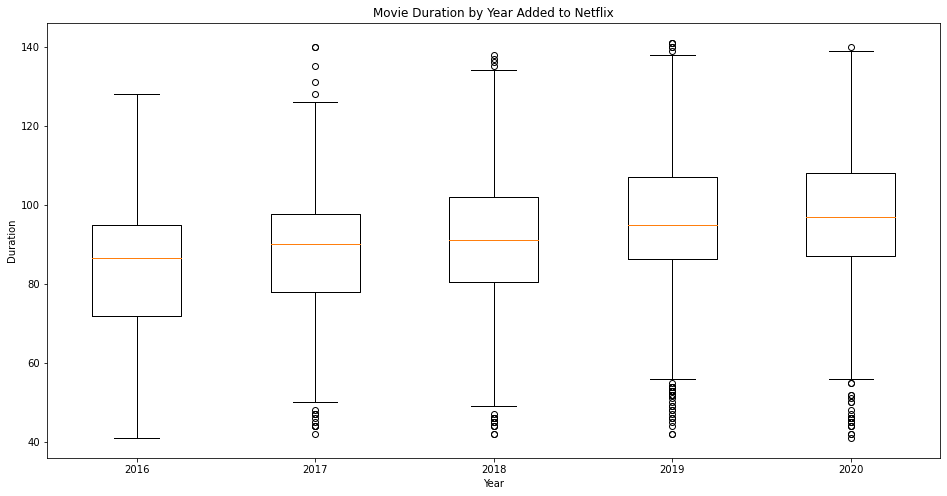

In [64]:
# This will let us see how the bulk of our data, that is, the central 50 percentiles
# and how it change over time
fig, ax = plt.subplots(figsize=(16,8))

data16 = netflix_df_ENG_MOVIES_within_2_std_of_mean[netflix_df_ENG_MOVIES_within_2_std_of_mean['year_added']==2016]['duration']
data17 = netflix_df_ENG_MOVIES_within_2_std_of_mean[netflix_df_ENG_MOVIES_within_2_std_of_mean['year_added']==2017]['duration']
data18 = netflix_df_ENG_MOVIES_within_2_std_of_mean[netflix_df_ENG_MOVIES_within_2_std_of_mean['year_added']==2018]['duration']
data19 = netflix_df_ENG_MOVIES_within_2_std_of_mean[netflix_df_ENG_MOVIES_within_2_std_of_mean['year_added']==2019]['duration']
data20 = netflix_df_ENG_MOVIES_within_2_std_of_mean[netflix_df_ENG_MOVIES_within_2_std_of_mean['year_added']==2020]['duration']

ax.boxplot([data16, data17, data18, data19, data20])


# Create a title
plt.title("Movie Duration by Year Added to Netflix")
plt.xlabel("Year")
plt.ylabel("Duration")
ax.set_xticklabels(['2016','2017','2018','2019','2020'])


# Show the plot
plt.show()



In [65]:
# This would indicate that the length of movies has on average been increasing year on year.
# The median line is trending towards an increase in duration.
# But averages can be misleading

In [66]:
# Being that the relative standard deviation of duration is a high percentage

In [67]:
RSD = 100*(netflix_df_ENG_MOVIES_within_2_std_of_mean.describe().loc['std', 'duration']/netflix_df_ENG_MOVIES_within_2_std_of_mean.describe().loc['mean', 'duration'])

In [68]:
str(round(RSD))+' %'

'21.0 %'

In [69]:
# We can say that a predictive model using linear regression will likely have a high uncertainty
# in its predictive capabilities also.

In [70]:
netflix_df_ENG_MOVIES_within_2_std_of_mean

,index,type,title,country,date_added,release_year,duration,genre,year_added
83,4644,Movie,One in a Billion,United States,2016-12-06,2016,70,Documentaries,2016
84,1822,Movie,Donald Glover: Weirdo,United States,2016-11-19,2012,65,Stand-Up,2016
85,5005,Movie,Pup Star,Canada,2016-10-29,2016,92,Children,2016
86,2817,Movie,Hot Bot,United States,2016-03-01,2016,93,Comedies,2016
87,4963,Movie,Prescription Thugs,United States,2016-04-15,2015,86,Documentaries,2016
...,...,...,...,...,...,...,...,...,...
2492,4987,Movie,Project Power,United States,2020-08-14,2020,113,Action,2020
2493,5255,Movie,Rogue Warfare: The Hunt,United States,2020-08-01,2020,104,Action,2020
2494,4991,Movie,Prospect,Canada,2020-11-02,2018,100,Sci-Fi,2020
2495,5281,Movie,Roped,United States,2020-05-02,2020,90,Children,2020


In [71]:
netflix_df_ENG_MOVIES_within_2_std_of_mean = netflix_df_ENG_MOVIES_within_2_std_of_mean.drop('index', axis =1)

In [72]:
netflix_df_ENG_MOVIES_within_2_std_of_mean = netflix_df_ENG_MOVIES_within_2_std_of_mean.sort_values('date_added')

In [73]:
netflix_df_ENG_MOVIES_within_2_std_of_mean

,type,title,country,date_added,release_year,duration,genre,year_added
89,Movie,Power Rangers Super Megaforce: The Legendary B...,United States,2016-01-01,2014,55,Uncategorized,2016
92,Movie,Power Rangers Samurai: Clash of the Red Rangers,United States,2016-01-01,2011,46,Children,2016
164,Movie,How to Change the World,Canada,2016-01-01,2015,110,Documentaries,2016
199,Movie,Tom Segura: Mostly Stories,United States,2016-01-08,2016,74,Stand-Up,2016
167,Movie,Frozen Planet: On Thin Ice,United Kingdom,2016-01-28,2011,47,Uncategorized,2016
...,...,...,...,...,...,...,...,...
1950,Movie,We Can Be Heroes,United States,2020-12-25,2020,101,Children,2020
2012,Movie,The Magic School Bus Rides Again In the Zone,Canada,2020-12-26,2020,46,Children,2020
2206,Movie,Death to 2020,United States,2020-12-27,2020,71,Comedies,2020
2472,Movie,Rango,United States,2020-12-28,2011,110,Children,2020


# Linear Regression

In [74]:
# As we just said:
# We can say that a predictive model using linear regression will
# likely have a high uncertainty in its predictive capabilities.

# But let's quantify and model that predictions durations

In [75]:
netflix_df_ENG_MOVIES_within_2_std_of_mean

,type,title,country,date_added,release_year,duration,genre,year_added
89,Movie,Power Rangers Super Megaforce: The Legendary B...,United States,2016-01-01,2014,55,Uncategorized,2016
92,Movie,Power Rangers Samurai: Clash of the Red Rangers,United States,2016-01-01,2011,46,Children,2016
164,Movie,How to Change the World,Canada,2016-01-01,2015,110,Documentaries,2016
199,Movie,Tom Segura: Mostly Stories,United States,2016-01-08,2016,74,Stand-Up,2016
167,Movie,Frozen Planet: On Thin Ice,United Kingdom,2016-01-28,2011,47,Uncategorized,2016
...,...,...,...,...,...,...,...,...
1950,Movie,We Can Be Heroes,United States,2020-12-25,2020,101,Children,2020
2012,Movie,The Magic School Bus Rides Again In the Zone,Canada,2020-12-26,2020,46,Children,2020
2206,Movie,Death to 2020,United States,2020-12-27,2020,71,Comedies,2020
2472,Movie,Rango,United States,2020-12-28,2011,110,Children,2020


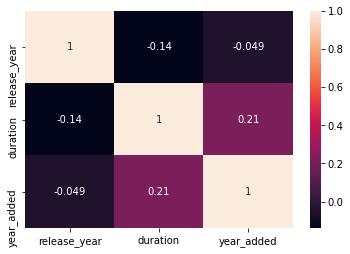

In [76]:
# Let's look at the correlation between variables
# We can do this with a correlation matrix heatmap from seaborn
sns.heatmap(netflix_df_ENG_MOVIES_within_2_std_of_mean.corr(), annot = True)

In [77]:
# Sk Learns linear regression doesn't work great with datetime time series.
# Thebest thing to do here is to normalise the data. the first day being 0 and last day being 1.

# Normalise the date_added from datetime object to value between 0 and 1.

# We make this function that can be used with pandas apply() to make a new column
def normalise(day):
    global netflix_df_ENG_MOVIES_within_2_std_of_mean
    start_day = netflix_df_ENG_MOVIES_within_2_std_of_mean['date_added'].min()
    end_day = netflix_df_ENG_MOVIES_within_2_std_of_mean['date_added'].max()
    
    # find a time delta duration of the total time from start to end
    data_duration =  end_day - start_day
    
    # for each day find the portion of the total amount of days since the start
    norm_day =  (day - start_day).days /data_duration.days
    
    return norm_day

# Apply the normalise function to the datetime column make a new column normalised_date
netflix_df_ENG_MOVIES_within_2_std_of_mean['Normalised_date'] = netflix_df_ENG_MOVIES_within_2_std_of_mean['date_added'].apply(normalise)

In [78]:
# Let's check the normalised data column has worked
netflix_df_ENG_MOVIES_within_2_std_of_mean.sample(5)

,type,title,country,date_added,release_year,duration,genre,year_added,Normalised_date
371,Movie,Girlfriend's Day,United States,2017-02-14,2017,71,Comedies,2017,0.224535
2232,Movie,God's Not Dead,United States,2020-04-01,2014,113,Dramas,2020,0.849945
1241,Movie,The Rolling Stones: Olé Olé Olé! A Trip Across...,United Kingdom,2019-03-22,2016,101,Documentaries,2019,0.644031
629,Movie,Camera Store,United States,2017-08-20,2016,104,Comedies,2017,0.326944
728,Movie,A Futile and Stupid Gesture,United States,2018-01-26,2018,102,Comedies,2018,0.414020


In [79]:
# Set the feature columns predictor variables
X = netflix_df_ENG_MOVIES_within_2_std_of_mean[['Normalised_date']]

# Set the target variable
y = netflix_df_ENG_MOVIES_within_2_std_of_mean['duration']

# Split the data into training and validation
train_X, val_X, train_y, val_y = train_test_split(X, y, test_size = 0.4)

# Instantiate a linear regression object
model = LinearRegression()

# Fit the model to the training data
model.fit(train_X, train_y)

LinearRegression()

In [80]:
# Make predictions of y values based on x validation values using the trained model object

predictions = model.predict(val_X)

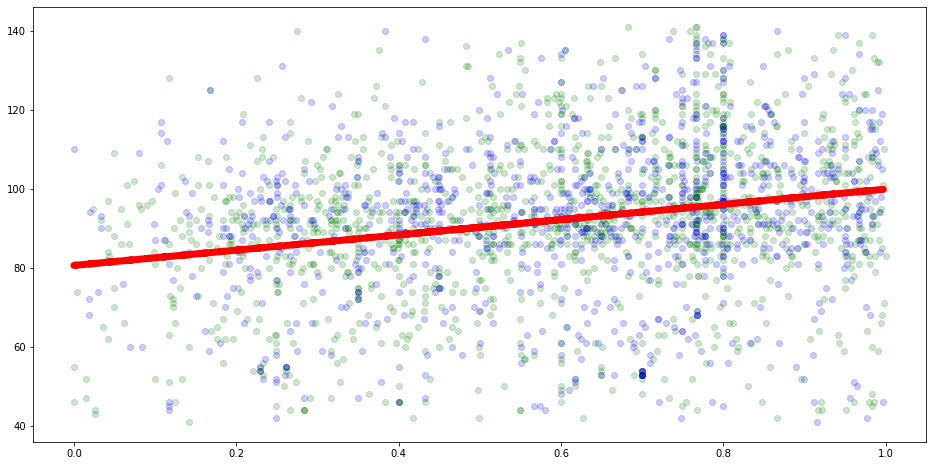

In [81]:
plt.figure(figsize=(16, 8))

plt.plot( train_X,train_y, linestyle ='None', marker = 'o', color = 'green', alpha = 0.2)
plt.plot( val_X,val_y, linestyle ='None', marker = 'o', color = 'blue', alpha = 0.2)
plt.plot(val_X, predictions, linestyle= '--',color = 'red',linewidth=7.0)


In [82]:
# We then compare our predicted y values to there y validation data counter parts

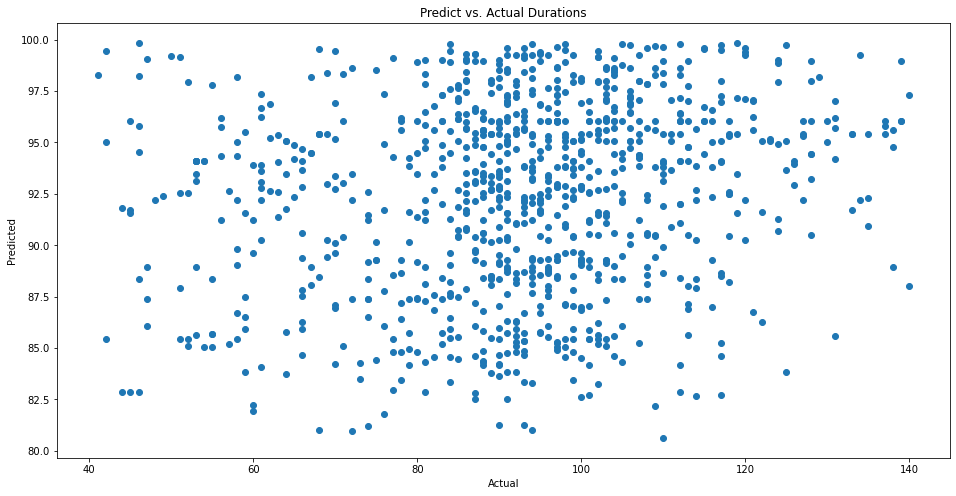

In [83]:
# from the correlation plot heatmap above we would expect that if we plotted the validation y values
# against predictions we should get a very low correlation due to the 0.21 correlation coefficient.

# With a perfect model we would expect to see a straight line here.
plt.figure(figsize=(16, 8))
plt.scatter(val_y,predictions)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predict vs. Actual Durations')


plt.show()

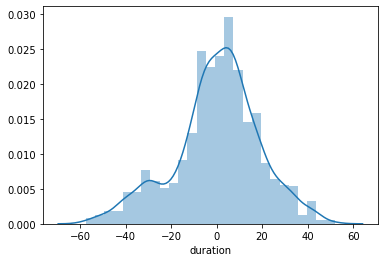

In [84]:
#residuals of predicitions and test data

# Althought there is a central tendancy of a very small duration difference
# the standard deviation is very large

sns.distplot((val_y - predictions))

In [85]:
from sklearn import metrics
# Inspect the error
print(metrics.mean_absolute_error(val_y, predictions))
print(metrics.mean_squared_error(val_y, predictions))
print(np.sqrt(metrics.mean_squared_error(val_y, predictions)) )

14.370207733054158
352.95114495958086
18.786994037354162


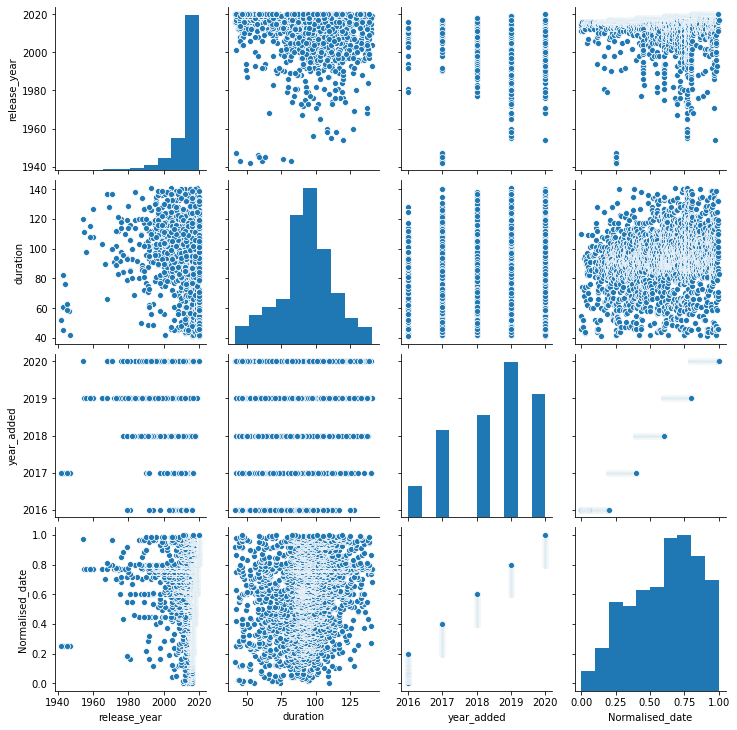

In [86]:
sns.pairplot(netflix_df_ENG_MOVIES_within_2_std_of_mean)

# We have analysed average duration changes over time for all movies 
# Now let's see if  trends change when we separate for different genres

# Note: we will now revert back to using our data-set before we removed the data below and above 2 std from the mean. Because it might punish certain genres and not others.

In [87]:
netflix_df_ENG_MOVIES.loc[:,'year_added'] = netflix_df_ENG_MOVIES.loc[:,'date_added'].apply(year_added)

In [88]:
# Remove the pre 2016 years
netflix_df_ENG_MOVIES = netflix_df_ENG_MOVIES[  netflix_df_ENG_MOVIES['year_added'] >= 2016]

In [89]:
# How many genres are there?
netflix_df_ENG_MOVIES['genre'].nunique()

19

In [90]:
netflix_df_ENG_MOVIES['genre'].value_counts()


Documentaries           521
Dramas                  489
Comedies                394
Children                342
Action                  321
Stand-Up                211
Horror Movies           144
Classic Movies           52
Thrillers                47
Uncategorized            30
Independent Movies       18
Music                    13
Sci-Fi                   11
Cult Movies               9
International Movies      9
Romantic Movies           3
Anime Features            1
LGBTQ Movies              1
Sports Movies             1
Name: genre, dtype: int64

In [91]:
# Being that documentaries are arguable not movies we could reemove them
# I would guess that documentaries got classed a movies because they wasn't classed as TV Shows

# If there are less than 50 movies we will not identify trends but rather the durations of a few films.

In [92]:
netflix_df_ENG_MOVIES = netflix_df_ENG_MOVIES[netflix_df_ENG_MOVIES['genre'] != 'Documentaries']

In [93]:
value_counts_df = pd.DataFrame(netflix_df_ENG_MOVIES['genre'].value_counts())
value_counts_df


,genre
Dramas,489
Comedies,394
Children,342
Action,321
Stand-Up,211
Horror Movies,144
Classic Movies,52
Thrillers,47
Uncategorized,30
Independent Movies,18


In [94]:
enough_additions = []

value_counts_df = pd.DataFrame(netflix_df_ENG_MOVIES['genre'].value_counts())

for index,row in value_counts_df.iterrows():
    if row['genre'] >50:
        enough_additions.append(index)
    else:
        pass
enough_additions
netflix_df_ENG_MOVIES[netflix_df_ENG_MOVIES['genre'].isnull()]

,type,title,country,date_added,release_year,duration,genre,year_added


In [95]:
netflix_df_ENG_MOVIES = netflix_df_ENG_MOVIES[netflix_df_ENG_MOVIES['genre'].isin(enough_additions)]
netflix_df_ENG_MOVIES['genre'].unique()


array(['Action', 'Dramas', 'Comedies', 'Horror Movies', 'Children',
       'Classic Movies', 'Stand-Up'], dtype=object)

In [96]:
# Below we will make a list of the genres and a list of 19 hex code colours
genres_list = netflix_df_ENG_MOVIES['genre'].unique()
colors = ['#7CFC00','#7FFF00','#32CD32','#00FF00','#228B22','#008000','#006400','#ADFF2F','#9ACD32','#00FF7F','#00FA9A','#90EE90','#98FB98','#8FBC8F','#3CB371','#2E8B57','#808000','#556B2F', '#6B8E23']


In [97]:
# We then assign a colour to each genre using key value pairs in a dict 
genre_to_color_dict = {genres_list[i]: colors[i] for i in range(0, netflix_df_ENG_MOVIES['genre'].nunique())}
genre_to_color_dict

{'Action': '#7CFC00',
 'Dramas': '#7FFF00',
 'Comedies': '#32CD32',
 'Horror Movies': '#00FF00',
 'Children': '#228B22',
 'Classic Movies': '#008000',
 'Stand-Up': '#006400'}

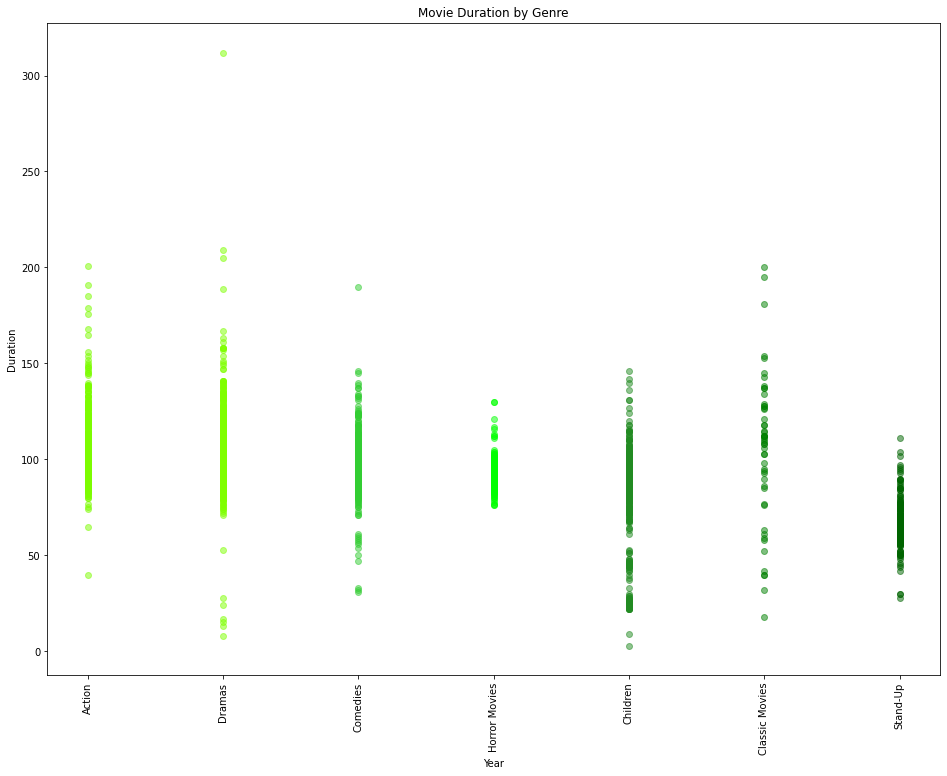

In [98]:
# Are there any trends in genre and duration

fig = plt.figure(figsize=(16,12))

# Create a scatter plot of duration versus year
for genres, colors in genre_to_color_dict.items():
    genre_df = netflix_df_ENG_MOVIES[netflix_df_ENG_MOVIES['genre'] == genres]
    plt.scatter(genre_df['genre'], genre_df['duration'], c = colors, alpha = 0.5)

# Create a title
plt.title("Movie Duration by Genre")
plt.xlabel("Year")
plt.ylabel("Duration")
plt.xticks(rotation = 90)


# Show the plot
plt.show()

# We should expect to see  height difference between columns if there are trends between genres

In [99]:
# As can be seen above we can see that there is some tendancies for
# differen genres to have different average runtimes
# There is definitely grouping of genres/colors.

# Let's look at averages. This Might be best visualised with a bar chart. A bar for every genre and year pair 

In [100]:
# First group by genre then by year

AVG_by_year_by_genre = pd.DataFrame(netflix_df_ENG_MOVIES.groupby(['genre','year_added'])['duration'].mean()).reset_index()
AVG_by_year_by_genre

,genre,year_added,duration
0,Action,2016,98.375000
1,Action,2017,101.357143
2,Action,2018,104.500000
3,Action,2019,110.604839
4,Action,2020,109.575758
5,Action,2021,108.000000
6,Children,2016,55.578947
7,Children,2017,75.450980
8,Children,2018,77.339286
9,Children,2019,80.878788


In [101]:
# We need to make a label for every bar we will need to iterate through the rows to do this

for lab, row in AVG_by_year_by_genre.iterrows():
    AVG_by_year_by_genre.loc[lab, 'Year_AND_Genre_label'] = str(row['genre'])+' '+str(row['year_added'])

AVG_by_year_by_genre

,genre,year_added,duration,Year_AND_Genre_label
0,Action,2016,98.375000,Action 2016
1,Action,2017,101.357143,Action 2017
2,Action,2018,104.500000,Action 2018
3,Action,2019,110.604839,Action 2019
4,Action,2020,109.575758,Action 2020
5,Action,2021,108.000000,Action 2021
6,Children,2016,55.578947,Children 2016
7,Children,2017,75.450980,Children 2017
8,Children,2018,77.339286,Children 2018
9,Children,2019,80.878788,Children 2019


In [102]:
genre_to_color_dict

{'Action': '#7CFC00',
 'Dramas': '#7FFF00',
 'Comedies': '#32CD32',
 'Horror Movies': '#00FF00',
 'Children': '#228B22',
 'Classic Movies': '#008000',
 'Stand-Up': '#006400'}

In [103]:
# We assign a unique colour to every genre using the dict from before
# With function that is apply to a new column

genre_to_color_dict

def get_colour(genre):
    global genre_to_color_dict
    return genre_to_color_dict[genre]
    

AVG_by_year_by_genre['Color'] = AVG_by_year_by_genre['genre'].apply(get_colour)

    
AVG_by_year_by_genre

,genre,year_added,duration,Year_AND_Genre_label,Color
0,Action,2016,98.375000,Action 2016,#7CFC00
1,Action,2017,101.357143,Action 2017,#7CFC00
2,Action,2018,104.500000,Action 2018,#7CFC00
3,Action,2019,110.604839,Action 2019,#7CFC00
4,Action,2020,109.575758,Action 2020,#7CFC00
5,Action,2021,108.000000,Action 2021,#7CFC00
6,Children,2016,55.578947,Children 2016,#228B22
7,Children,2017,75.450980,Children 2017,#228B22
8,Children,2018,77.339286,Children 2018,#228B22
9,Children,2019,80.878788,Children 2019,#228B22


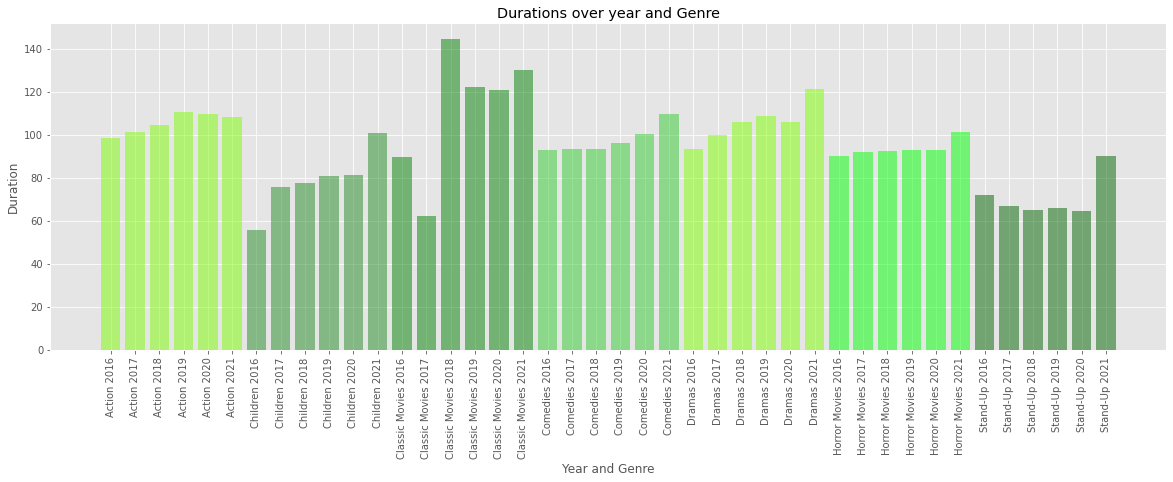

In [104]:
# Then we plot the bar chart for each year and genre label

plt.style.use('ggplot')
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation = 90)

plt.bar(x= AVG_by_year_by_genre['Year_AND_Genre_label'], height=AVG_by_year_by_genre['duration'],
        alpha = 0.5, color=AVG_by_year_by_genre['Color'])

plt.title("Durations over year and Genre")
plt.xlabel('Year and Genre')
plt.ylabel("Duration")

    

plt.show()


# Linear Regression - Could we actually plot the above data as a scatter graph and produce a linear model line for each of the individual genres?


In [105]:
# Working out which will need to be removed can be made easier
# if we pivot the table and observe the NaN values

# We can then pivot the above table 
PIVOT_DF = AVG_by_year_by_genre.pivot(index='genre', columns='year_added')
#PIVOT_DF = PIVOT_DF.drop([2008,2009,2010,2011,2012,2013,2014,2015], axis =1, level=1)

PIVOT_DF = PIVOT_DF.drop('Color', axis =1, level=0)
PIVOT_DF = PIVOT_DF.drop('Year_AND_Genre_label', axis =1, level=0)

PIVOT_DF['6_year_average'] = PIVOT_DF.mean(numeric_only=True, axis=1)
PIVOT_DF = PIVOT_DF.sort_values('6_year_average')
PIVOT_DF

duration                                                  \
year_added           2016        2017        2018        2019        2020   
genre                                                                       
Stand-Up        71.800000   66.851064   64.947368   65.760000   64.612903   
Children        55.578947   75.450980   77.339286   80.878788   81.073394   
Horror Movies   90.250000   92.000000   92.218750   93.040816   92.771429   
Comedies        92.812500   93.413793   93.080000   96.311475  100.146789   
Action          98.375000  101.357143  104.500000  110.604839  109.575758   
Dramas          93.142857   99.728571  105.818182  108.441379  105.924138   
Classic Movies  89.500000   62.357143  144.500000  122.250000  120.909091   

                           6_year_average  
year_added            2021                 
genre                                      
Stand-Up         90.000000      70.661889  
Children        100.625000      78.491066  
Horror Movies   101.000000      93.546832  
Comedies        109.571429      97.555998  
Action          108.000000     105.402123  
Dramas          121.333333     105.731410  
Classic Movies  130.000000     111.586039

In [106]:
# From this we can see that we may ru into a few issues.
# this won't work if a there is a gap in years were content has not been added for a genre.
#### If this is the case we can only include the longest consecutive run from the genre.

### We also won't be able to to do this for and genres that have only been added during one year.

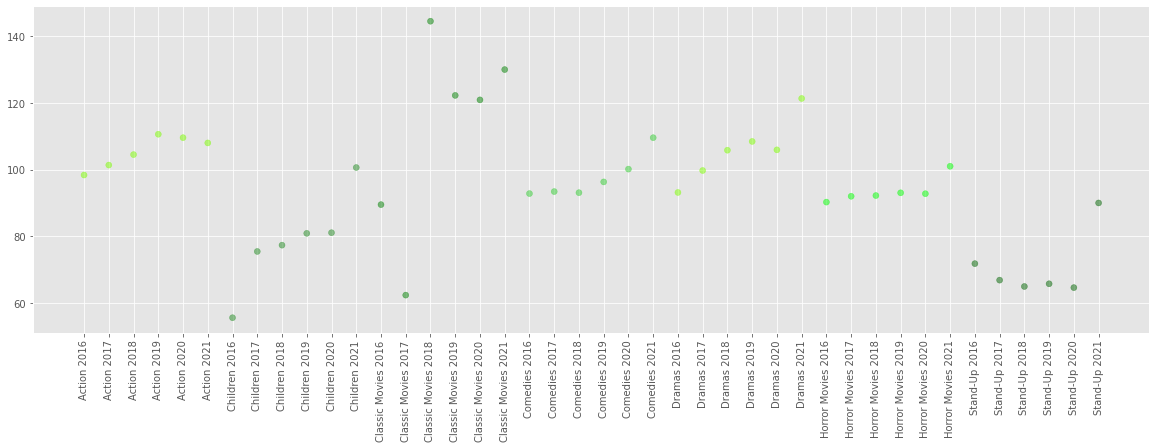

In [107]:


plt.style.use('ggplot')
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation = 90)

plt.scatter(x= AVG_by_year_by_genre['Year_AND_Genre_label'],
            y=AVG_by_year_by_genre['duration'],
            alpha = 0.5,
            color=AVG_by_year_by_genre['Color'])
    

plt.show()


In [108]:
AVG_by_year_by_genre.sample(10)

,genre,year_added,duration,Year_AND_Genre_label,Color
0,Action,2016,98.375000,Action 2016,#7CFC00
37,Stand-Up,2017,66.851064,Stand-Up 2017,#006400
38,Stand-Up,2018,64.947368,Stand-Up 2018,#006400
26,Dramas,2018,105.818182,Dramas 2018,#7FFF00
2,Action,2018,104.500000,Action 2018,#7CFC00
31,Horror Movies,2017,92.000000,Horror Movies 2017,#00FF00
15,Classic Movies,2019,122.250000,Classic Movies 2019,#008000
19,Comedies,2017,93.413793,Comedies 2017,#32CD32
18,Comedies,2016,92.812500,Comedies 2016,#32CD32
6,Children,2016,55.578947,Children 2016,#228B22


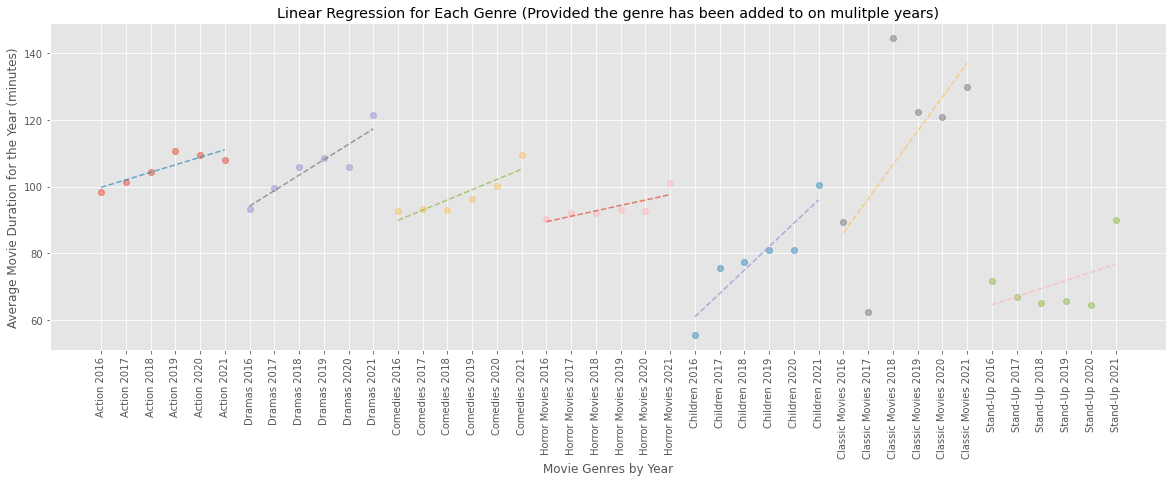

In [109]:
plt.style.use('ggplot')
fig = plt.figure(figsize=(20,6))
plt.xticks(rotation = 90)

current_start = 0
for genre_x in genres_list:
    number_of_years_added_to =len(AVG_by_year_by_genre[AVG_by_year_by_genre['genre'] == genre_x])
    if number_of_years_added_to>1:

        # Find the number of years the genre has been added , the is the count of rows
        # the genre is present in the in the AVG_by_year_by_genre dataframe


        # Make a data frame containing the one genre
        genre_x_DF = AVG_by_year_by_genre[AVG_by_year_by_genre['genre'] == genre_x]

        # Plot the genre
        plt.plot(genre_x_DF['Year_AND_Genre_label'], genre_x_DF['duration'],
                 alpha = 0.5, ls = ' ', marker = 'o')

        
        
        # Plot the genres linear regression

        # For each of the years make an x index starting at 0 up to the 
        # This is arbitrary but needed to calc lin reg, you wont actually be plotting this
        x = np.arange(    0 + current_start   ,     number_of_years_added_to  +  current_start  )
        y = genre_x_DF['duration']
        m, b = np.polyfit(x, y, 1)

        current_start = current_start + number_of_years_added_to

        plt.plot(genre_x_DF['Year_AND_Genre_label'],  m*x + b  , alpha = 0.7, ls='--')
    else:
        
        current_start = current_start + number_of_years_added_to
        pass

plt.title('Linear Regression for Each Genre (Provided the genre has been added to on mulitple years)')
plt.ylabel('Average Movie Duration for the Year (minutes)')
plt.xlabel('Movie Genres by Year')
plt.show()


# Conclusion

So, what can we deduce?
    
For each of the 5 movie genres that have had significant (at least 50) additional titles added to them, for years 2016 - 2021 there has been a positive correlation with movie length increase over time.